<a href="https://colab.research.google.com/github/arzumanyansona/Classification/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("/content/credit_risk.csv")

In [3]:
data

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [4]:
ohe_data= pd.get_dummies(data, columns = ["Home", "Intent", "Default"])

In [5]:
ohe_data

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length,Home_MORTGAGE,...,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE,Default_N,Default_Y
0,0,22,59000,123.0,35000,16.02,1,0.59,3,0,...,0,1,0,0,0,0,1,0,0,1
1,1,21,9600,5.0,1000,11.14,0,0.10,2,0,...,1,0,0,1,0,0,0,0,1,0
2,2,25,9600,1.0,5500,12.87,1,0.57,3,1,...,0,0,0,0,0,1,0,0,1,0
3,3,23,65500,4.0,35000,15.23,1,0.53,2,0,...,0,1,0,0,0,1,0,0,1,0
4,4,24,54400,8.0,35000,14.27,1,0.55,4,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,1.0,5800,13.16,0,0.11,30,1,...,0,0,0,0,0,0,1,0,1,0
32577,32577,54,120000,4.0,17625,7.49,0,0.15,19,1,...,0,0,0,0,0,0,1,0,1,0
32578,32578,65,76000,3.0,35000,10.99,1,0.46,28,0,...,0,1,0,0,1,0,0,0,1,0
32579,32579,56,150000,5.0,15000,11.48,0,0.10,26,1,...,0,0,0,0,0,0,1,0,1,0


In [6]:
target = ohe_data["Status"]

In [7]:
data=ohe_data.drop(["Status"], axis = 1)

In [8]:
data.head()

,Id,Age,Income,Emp_length,Amount,Rate,Percent_income,Cred_length,Home_MORTGAGE,Home_OTHER,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE,Default_N,Default_Y
0,0,22,59000,123.0,35000,16.02,0.59,3,0,0,0,1,0,0,0,0,1,0,0,1
1,1,21,9600,5.0,1000,11.14,0.10,2,0,0,1,0,0,1,0,0,0,0,1,0
2,2,25,9600,1.0,5500,12.87,0.57,3,1,0,0,0,0,0,0,1,0,0,1,0
3,3,23,65500,4.0,35000,15.23,0.53,2,0,0,0,1,0,0,0,1,0,0,1,0
4,4,24,54400,8.0,35000,14.27,0.55,4,0,0,0,1,0,0,0,1,0,0,0,1


In [9]:
data = data.fillna(0)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        32581 non-null  int64  
 1   Age                       32581 non-null  int64  
 2   Income                    32581 non-null  int64  
 3   Emp_length                32581 non-null  float64
 4   Amount                    32581 non-null  int64  
 5   Rate                      32581 non-null  float64
 6   Percent_income            32581 non-null  float64
 7   Cred_length               32581 non-null  int64  
 8   Home_MORTGAGE             32581 non-null  uint8  
 9   Home_OTHER                32581 non-null  uint8  
 10  Home_OWN                  32581 non-null  uint8  
 11  Home_RENT                 32581 non-null  uint8  
 12  Intent_DEBTCONSOLIDATION  32581 non-null  uint8  
 13  Intent_EDUCATION          32581 non-null  uint8  
 14  Intent

In [11]:
data.head().isnull

<bound method DataFrame.isnull of    Id  Age  Income  Emp_length  Amount   Rate  Percent_income  Cred_length  \
0   0   22   59000       123.0   35000  16.02            0.59            3   
1   1   21    9600         5.0    1000  11.14            0.10            2   
2   2   25    9600         1.0    5500  12.87            0.57            3   
3   3   23   65500         4.0   35000  15.23            0.53            2   
4   4   24   54400         8.0   35000  14.27            0.55            4   

   Home_MORTGAGE  Home_OTHER  Home_OWN  Home_RENT  Intent_DEBTCONSOLIDATION  \
0              0           0         0          1                         0   
1              0           0         1          0                         0   
2              1           0         0          0                         0   
3              0           0         0          1                         0   
4              0           0         0          1                         0   

   Intent_EDUCATION  I

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [14]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [15]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
from sklearn import metrics
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.8772441307350007)

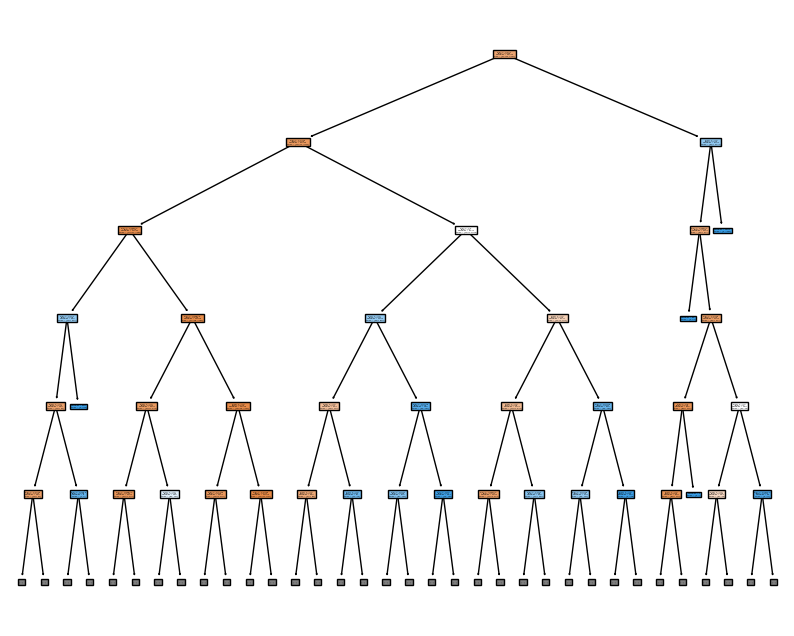

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plot_tree(clf,max_depth=5, filled=True)
plt.show()